In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as ps
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

From pandas


In [75]:
df=ps.read_csv('/content/data.csv')

In [76]:
df.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [77]:
df.describe()

,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


In [78]:
X=df[['GDP per capita (USD)']]
print(X)

    GDP per capita (USD)
0           26456.387938
1           27287.083401
2           28384.987785
3           29932.493910
4           31007.768407
5           32181.154537
6           32238.157259
7           35638.421351
8           36215.447591
9           36547.738956
10          36732.034744
11          38341.307570
12          38992.148381
13          41627.129269
14          42025.617373
15          42404.393738
16          45856.625626
17          47260.800458
18          48210.033111
19          48697.837028
20          50683.323510
21          50922.358023
22          51935.603862
23          52279.728851
24          54209.563836
25          55938.212809
26          60235.728492


In [79]:
Y=df['Life satisfaction']

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [81]:
modele=LinearRegression()

In [82]:
modele.fit(X_train,Y_train)

LinearRegression()

In [83]:
y_pred=modele.predict(X_test)

In [84]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(mse)
print(r2)

0.19546766227160994
0.3181360618432211


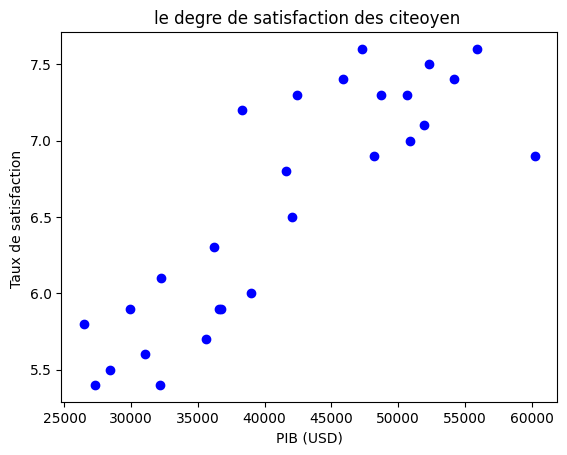

In [85]:
plt.scatter(X, Y, color='blue')  # Toutes les données X et Y
plt.title('le degre de satisfaction des citeoyen ')
plt.xlabel('PIB (USD)')
plt.ylabel('Taux de satisfaction ')
plt.show()

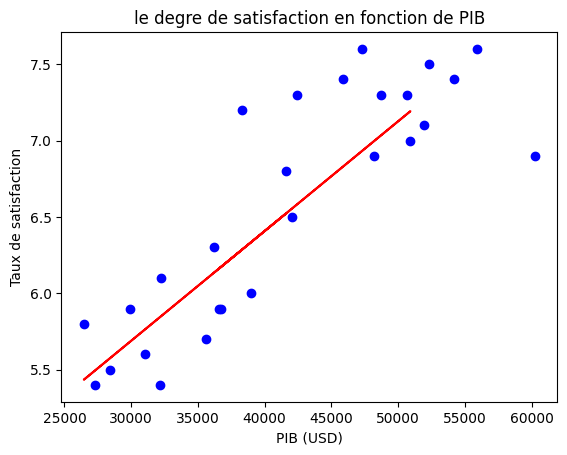

In [86]:
plt.scatter(X, Y, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('le degre de satisfaction en fonction de PIB')
plt.xlabel('PIB (USD)')
plt.ylabel('Taux de satisfaction')
plt.show()

In [87]:
print(f"Le coefficient w1 (pente) est : {modele.coef_[0]}")
print(f"L'ordonnée à l'origine w0 (intercept) est : {modele.intercept_}")

Le coefficient w1 (pente) est : 7.18650303768337e-05
L'ordonnée à l'origine w0 (intercept) est : 3.532710807241324


In [92]:
y2=modele.intercept_+modele.coef_*50000
print("le taux de stisfaction pour le model from scrtach",y1)

le taux de stisfaction pour le model from scrtach 7.13849932600579


In [93]:
Y=df['Life satisfaction']
X=df['GDP per capita (USD)']
X= [round(x, 2) for x in X]
X = np.array(X)
Y=[round(y, 2) for y in Y]
Y=np.array(Y)
print(X)
print(Y)

[26456.39 27287.08 28384.99 29932.49 31007.77 32181.15 32238.16 35638.42
 36215.45 36547.74 36732.03 38341.31 38992.15 41627.13 42025.62 42404.39
 45856.63 47260.8  48210.03 48697.84 50683.32 50922.36 51935.6  52279.73
 54209.56 55938.21 60235.73]
[5.8 5.4 5.5 5.9 5.6 5.4 6.1 5.7 6.3 5.9 5.9 7.2 6.  6.8 6.5 7.3 7.4 7.6
 6.9 7.3 7.3 7.  7.1 7.5 7.4 7.6 6.9]


Linear Regression from scratch to compare the parameters w0 and w1 using different methods.


In [94]:
def moyen(X):
  return sum(X)/len(X)

def Cov(X,Y):
  moy_x=moyen(X)
  moy_y=moyen(Y)
  C = np.dot(X - moy_x, Y - moy_y) / len(X)
  #C=(np.dot(X,Y)/len(X))-moy_x*moy_x
  return C
def RLfitting(X,Y):
  w1=Cov(X,Y)/Cov(X,X)
  w0=moyen(Y)-w1*moyen(X)
  return w0,w1

In [95]:
w0, w1 = RLfitting(X, Y)

In [96]:
print(w0,w1)

3.7490492901615267 6.778900071688526e-05


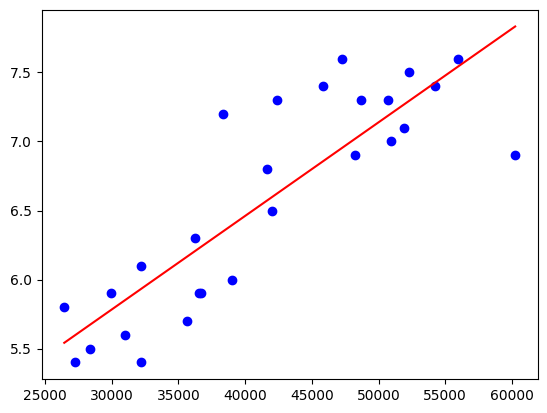

In [97]:
plt.scatter(X,Y,color='blue')
plt.plot(X,RLfitting(X,Y)[0]+RLfitting(X,Y)[1]*X,color='red')
plt.show()

Maintenant test le deux modele par la meme valeur de dans notre cas c'est PIB

In [99]:
y2=modele.intercept_+modele.coef_*50000
y1=w0+w1*50000
print("le taux de stisfaction pour le model from scrtach",y1)
print("le taux de stisfaction on utilisant sktlearn ",y2)

le taux de stisfaction pour le model from scrtach 7.13849932600579
le taux de stisfaction on utilisant sktlearn  [7.12596233]


💪


FIN see you son